In [1]:
#Processing Script#

In [1]:
import scanpy as sc
import os
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [3]:
# HCLA Script (minimal, working)
# Note this (, use_raw=False, standard_scale="var") was added in plotting functions for HCLA but remove for murine ones:

output =  "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/results_hcla"
cell_type_of_interest = "alveolar macrophage"
os.makedirs(output, exist_ok=True)

import scanpy as sc
import bbknn
import matplotlib.pyplot as plt

path = "/mnt/data/melhajjar/ipf_metadata_analysis/human_cell_atlas/lung_core_HLCA.h5ad"

# 1) Load IN-MEMORY (backed='r' breaks neighbors/BBKNN); subsample
adata = sc.read_h5ad(path)              # if you must: sc.read_h5ad(path, backed='r').to_memory()
adata = adata[::40, :].copy()

# 2) Basic preprocessing (before PCA/BBKNN)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
adata = adata[:, adata.var["highly_variable"]].copy()

# 3) PCA → BBKNN (BBKNN REPLACES sc.pp.neighbors)
sc.tl.pca(adata, n_comps=50, svd_solver="arpack")
bbknn.bbknn(adata, batch_key="dataset")     # builds neighbor graph
sc.tl.umap(adata)

# adata = adata[adata.obs['cell_type'] == cell_type_of_interest].copy()

# 4) Plot & save
sc.pl.umap(adata, color="dataset", title="UMAP (BBKNN by dataset)",
           frameon=False, s=60, show=False)
plt.gcf().savefig("umap_bbknn_dataset.pdf", bbox_inches="tight", dpi=300)
plt.close()



# bin numeric ages into three groups and store as categorical
ages = pd.to_numeric(adata.obs["age_or_mean_of_age_range"], errors="coerce")
adata.obs["age_groups"] = pd.cut(
    ages,
    bins=[-np.inf, 35, 50, np.inf],
    labels=["≤35", "35–50", ">50"]
).astype("category")



# pip install mygene
import re, pandas as pd
import mygene
mg = mygene.MyGeneInfo()

# strip version (ENSG... .xx)
ens = pd.Index(adata.var_names).str.replace(r'\.\d+$','', regex=True)

df = mg.querymany(ens.tolist(),
                  scopes='ensembl.gene', fields='symbol',
                  species='human', as_dataframe=True)

# keep first match per queried ENSG
df = df[~df.index.duplicated(keep='first')]

adata.var['ensembl_id'] = ens
adata.var['symbol'] = ens.map(df['symbol'])
adata.var_names = adata.var['symbol'].fillna(adata.var['ensembl_id'])
adata.var_names_make_unique()

# rename 'age_groups' -> 'age' (overwrites any existing 'age')
adata.obs["age"] = adata.obs.pop("age_groups")

KeyboardInterrupt: 

In [8]:
# #Calico Script
# file_path = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/lung_calico.h5ad"
# adata = sc.read_h5ad(file_path)
# cell_type_of_interest = "alveolar macrophage"
# output =  "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/results_calico"
# adata = adata[adata.obs['cell_type'] == cell_type_of_interest].copy()

In [55]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.1,seurat_clusters,sig_Type_2_pneumocytes1,sig_Type_1_pneumocytes1,sig_Ciliated_cells1,sig_Club_cells1,sig_Goblet_cells1,...,RNA_snn_res.2,RNA_snn_res.2.1,RNA_snn_res.2.2,RNA_snn_res.2.3,RNA_snn_res.2.4,cluster_name,celltype_fine,ident,sizeFactor,age
old_1:TACGGTTCCTGC,old,1454.0,977,16,10,0.042516,-0.331547,-0.079200,0.140783,-0.093050,...,22,22,22,19,19,C19: Lipofibroblast,Alveolar macrophage,10,1.774022,old
old_1:GGTCGGCTGACA,old,988.0,727,16,2,-0.147627,-0.290448,-0.322447,0.367369,-0.054298,...,22,22,22,19,19,C19: Lipofibroblast,Alveolar macrophage,2,1.205457,old
old_1:TGGAATTGGATA,old,828.0,629,2,10,1.176347,-0.282658,-0.319533,0.671291,-0.047414,...,16,16,16,15,14,C14: Alveolar_macrophage,Alveolar macrophage,10,1.010241,old
old_1:TGGCATTGTATG,old,1127.0,760,16,10,-0.182493,-0.295871,-0.368495,0.238361,-0.042230,...,22,22,22,19,19,C19: Lipofibroblast,Alveolar macrophage,10,1.375050,old
old_1:CCATTGCCAGTT,old,794.0,594,2,2,0.238950,0.442210,-0.249036,1.017609,-0.081559,...,2,2,2,2,2,C2: Eosinophils,Alveolar macrophage,2,0.968758,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
young_8:TCTACTCTGACT,young,386.0,296,2,2,0.688288,-0.175763,-0.200117,1.127041,-0.026987,...,2,2,2,2,2,C2: Eosinophils,Alveolar macrophage,2,0.470958,young
young_8:CACATAGGACGC,young,334.0,228,2,2,1.184365,-0.181474,-0.177765,3.053240,-0.028132,...,2,2,2,2,2,C2: Eosinophils,Alveolar macrophage,2,0.407513,young
young_8:TCAGTATATCAC,young,274.0,229,2,2,-0.497978,-0.149371,-0.152786,1.315307,0.000000,...,2,2,2,2,2,C2: Eosinophils,Alveolar macrophage,2,0.334307,young
young_8:CACAGATCTCAT,young,291.0,222,2,2,0.143757,-0.089570,0.504760,2.733535,-0.007307,...,2,2,2,2,2,C2: Eosinophils,Alveolar macrophage,2,0.355048,young


In [2]:
tissue = "Lung"
cell_type_of_interest = "lung macrophage"

In [3]:
file_path = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/tabula-muris-senis-droplet-processed-official-annotations-" + tissue + ".h5ad"
adata = sc.read_h5ad(file_path)
output =  "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/results"
os.makedirs(output, exist_ok=True)

/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [4]:
# #Option if you want to filter for a cell type of interest
# cell_type_of_interest = "alveolar macrophage"
# adata = adata[adata.obs['cell_type'] == cell_type_of_interest].copy()

In [5]:
adata = adata[adata.obs['sex'] != 'female'].copy()
adata = adata[adata.obs['age'] != '1m'].copy()

In [93]:
cell_type_of_interest = "Interstitial_macrophages"
file_path = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/GSE124872_seurat_cells_annotated.h5ad"
adata = sc.read_h5ad(file_path)
output =  "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/results_GSE124872_murine_lung_cell_atlas"
os.makedirs(output, exist_ok=True)
adata = adata[adata.obs['celltype_fine'] == cell_type_of_interest].copy()


<Axes: xlabel='% of total counts', ylabel='index'>

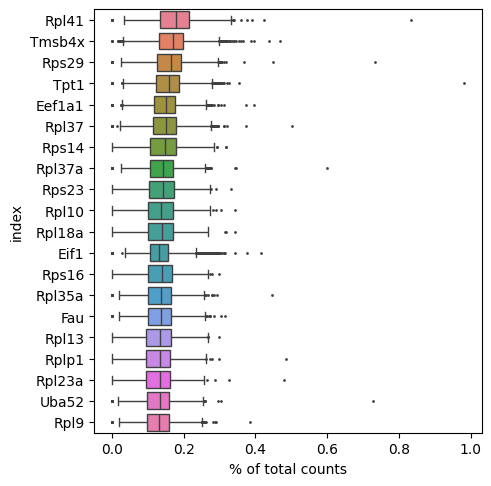

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, show=False)

<Axes: xlabel='% of total counts', ylabel='index'>

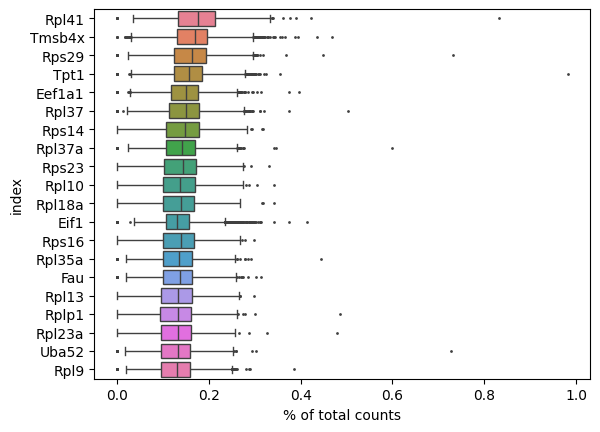

In [7]:
ptype = "highest_expr_genes_boxplot"
fig, ax = plt.subplots()  # no figsize
sc.pl.highest_expr_genes(adata, n_top=20, ax=ax, show=False)
fig.savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
            bbox_inches="tight")
plt.close(fig)



In [8]:
import matplotlib.pyplot as plt

# compute PCA if missing
if "pca" not in adata.uns or "X_pca" not in adata.obsm_keys():
    sc.pp.pca(adata, n_comps=50, svd_solver="arpack")  # quick, safe default

# # elbow/variance plot
# sc.pl.pca_variance_ratio(adata, n_pcs=20, show=False)
# plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__pca_variance_ratio.pdf",
#                   bbox_inches="tight", dpi=300)
# plt.close()


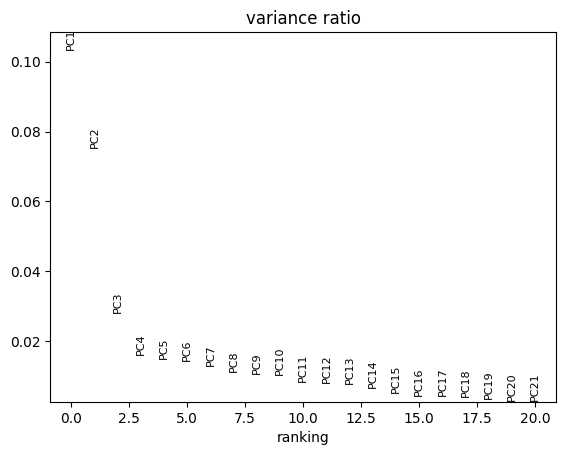

In [9]:
sc.pl.pca_variance_ratio(adata, n_pcs=20)

In [10]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# sc.tl.paga(adata)
# sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
# sc.tl.umap(adata, init_pos='paga')

In [12]:
sc.tl.umap(adata)

/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [13]:
adata.obs

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
AAACCTGAGACACTAA-1-31-0-0,18m,MACA_18m_M_LUNG_52_AAACCTGAGACACTAA,bronchial smooth muscle cell,NA,Capillary,droplet,18-M-52,1635.0,male,nan,Lung,Lung,3254.0,1,6
AAACCTGCAAAGCGGT-1-31-0-0,18m,MACA_18m_M_LUNG_52_AAACCTGCAAAGCGGT,B cell,NA,B,droplet,18-M-52,1015.0,male,nan,Lung,Lung,2954.0,4,3
AAACCTGCACGTCTCT-1-31-0-0,18m,MACA_18m_M_LUNG_52_AAACCTGCACGTCTCT,bronchial smooth muscle cell,NA,Capillary,droplet,18-M-52,1637.0,male,nan,Lung,Lung,3292.0,1,6
AAACCTGGTGTCCTCT-1-31-0-0,18m,MACA_18m_M_LUNG_52_AAACCTGGTGTCCTCT,"CD8-positive, alpha-beta T cell",NA,CD8+ T,droplet,18-M-52,1193.0,male,nan,Lung,Lung,4548.0,14,13
AAACGGGCAAACCTAC-1-31-0-0,18m,MACA_18m_M_LUNG_52_AAACGGGCAAACCTAC,bronchial smooth muscle cell,NA,Capillary,droplet,18-M-52,2245.0,male,nan,Lung,Lung,5143.0,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P8_13_TTTGGTTAGGGATACC-1,3m,10X_P8_13_TTTGGTTAGGGATACC,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,2803.0,10,12
10X_P8_13_TTTGGTTTCCTGTACC-1,3m,10X_P8_13_TTTGGTTTCCTGTACC,NK cell,CL:0000623,Natural Killer,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,3049.0,7,5
10X_P8_13_TTTGTCAAGAGTCGGT-1,3m,10X_P8_13_TTTGTCAAGAGTCGGT,pulmonary interstitial fibroblast,CL:0000499,Myofibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,3041.0,15,22


In [16]:
import matplotlib.colors as mcolors

ptype = "umap_ages"   

# cats = adata.obs["age"].cat.categories
# cmap = plt.get_cmap("Blues")
# palette = [mcolors.to_hex(cmap(i % cmap.N)) for i in range(len(cats))]
# sc.pl.umap(adata, color="age", s=220, frameon=False, title="", show=False,palette=palette)

# adata.obs["celltype_fine"] = adata.obs["celltype_fine"].str.replace("_", " ")
ptype= "umap_cell_types"
sc.pl.umap(adata, color="celltype_fine", s=220, frameon=False, title="", show=False)
# plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
#                   bbox_inches="tight", dpi=300)
# plt.close()

KeyError: 'celltype_fine'

In [ ]:
adata.obs

In [103]:
import matplotlib.pyplot as plt

# fix the category order
adata.obs["age"] = adata.obs["orig.ident"].astype("category").cat.set_categories(["young","old"], ordered=True)

# darkest + medium from Blues
palette = {"old": "#08306b",
           "young": "#66c2a5"} # mid blue (clearly visible)


In [18]:
ptype = "umap_ages"
sc.pl.umap(adata, color="age", s=220, frameon=False, title="", show=False, palette=palette)
plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
                  bbox_inches="tight", dpi=300)
plt.close()

In [31]:
ptype = "umap_ages_test"

cats = adata.obs["cell_ontology_class"].cat.categories
cmap = plt.get_cmap("tab20")
palette = [mcolors.to_hex(cmap(i % cmap.N)) for i in range(len(cats))]

sc.pl.umap(adata, color="cell_ontology_class", s=220, frameon=False, title="",
           palette=palette, show=False)
plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
                  bbox_inches="tight", dpi=300)
plt.close()

In [15]:
# fig, ax = plt.subplots()  # no figsize
# sc.pl.umap(adata, color="age", s=220, frameon=False, ax=ax, title="", show=False)
# fig.savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
#             bbox_inches="tight")
# plt.close(fig)


# celltypist_label_transfer.py
# Usage:
#   python celltypist_label_transfer.py \
#       --ref path/to/reference.h5ad --query path/to/query.h5ad \
#       --labels_col cell_ontology_class \
#       --out_annotated query_annotated.h5ad \
#       --out_model ref_celltypist_model.pkl


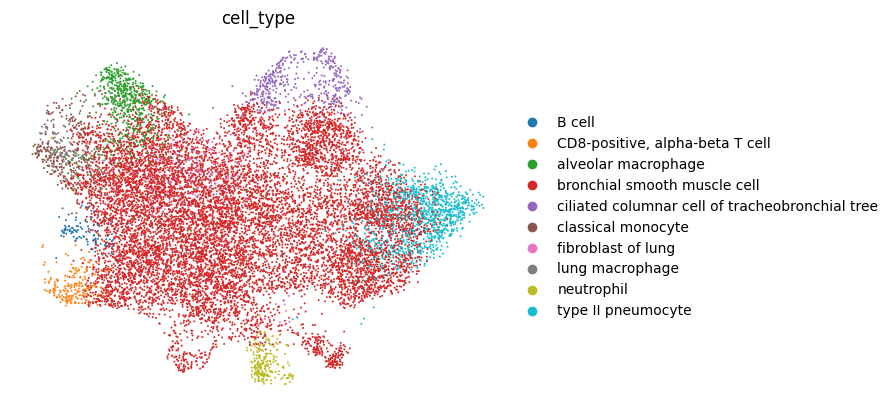

In [47]:
import scanpy as sc
sc.pl.umap(adata_q, color="cell_type", frameon=False)


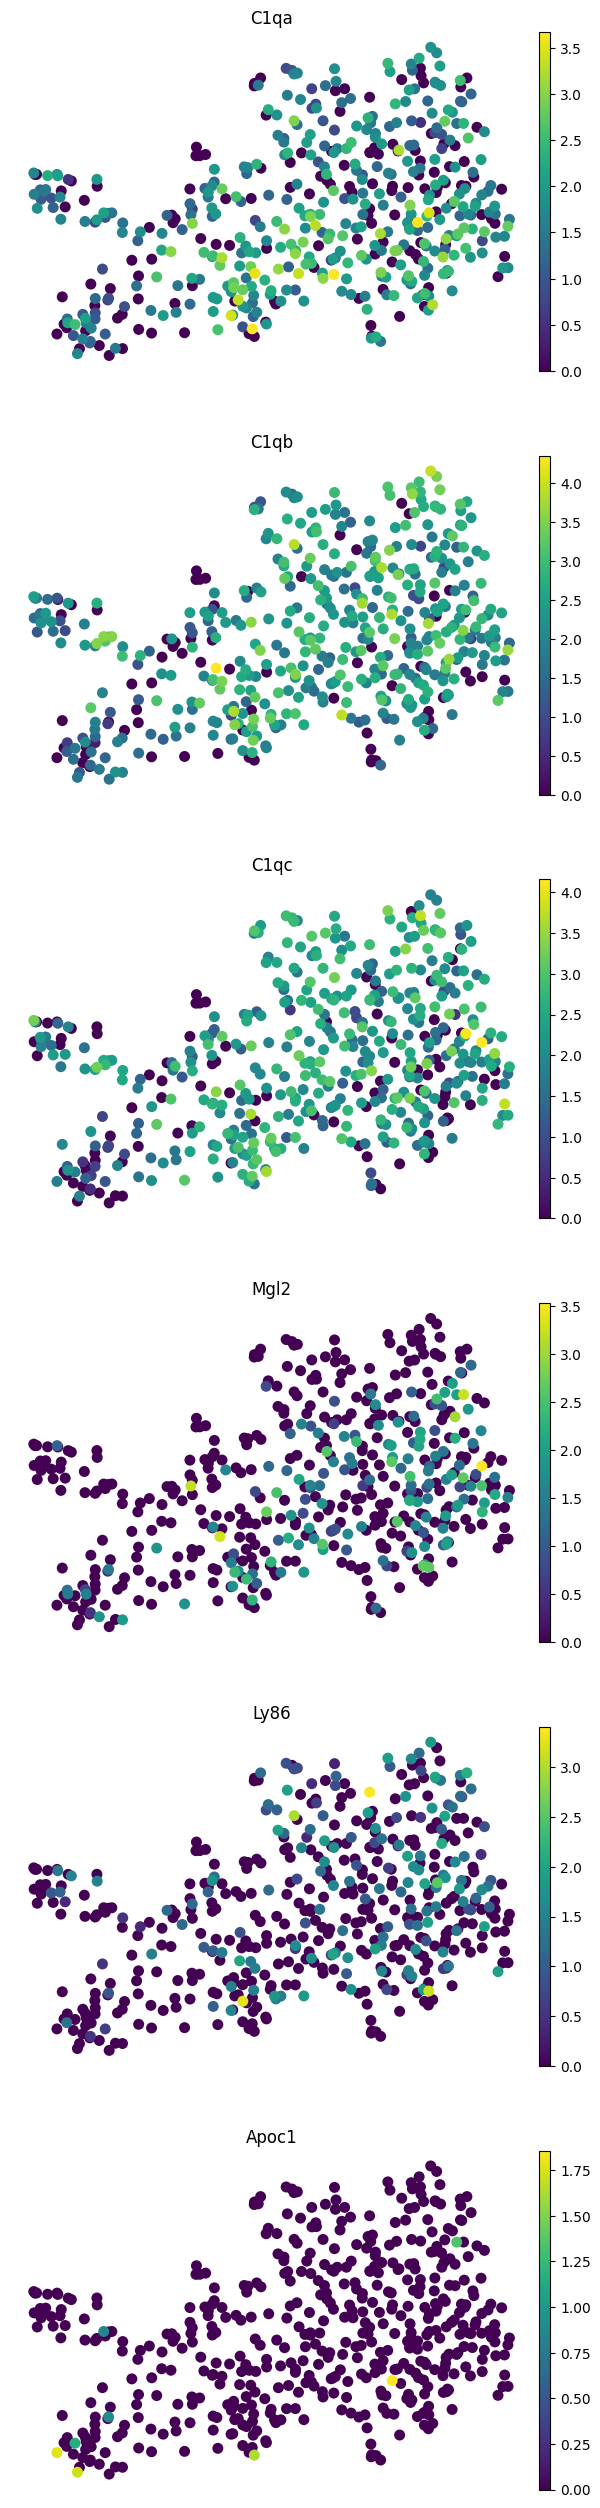

In [112]:
# sc.pl.umap(adata, color=["H2-DMa", "Ccl12","Mgl2","Serping1"], frameon=False, s=250, ncols=2)
# output ="/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/results"
output =  "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/results_GSE124872_murine_lung_cell_atlas"
sc.settings.figdir = output   # folder must exist
sc.pl.umap(adata, color=["C1qa", "C1qb", "C1qc","Mgl2","Ly86", "Apoc1"], frameon=False, s=250, ncols=1,save="IMs_C1q_umaps.pdf")
# sc.pl.umap(adata, color=["Mgl2", "Mrc1"], frameon=False, s=250, ncols=2,save="_M2_markers_umaps.pdf")
# sc.pl.umap(adata, color="Beta-s", frameon=False, s=250, ncols=2,save="_betas_marker_umaps.pdf")
# sc.pl.umap(adata, color="age", frameon=False, s=250)

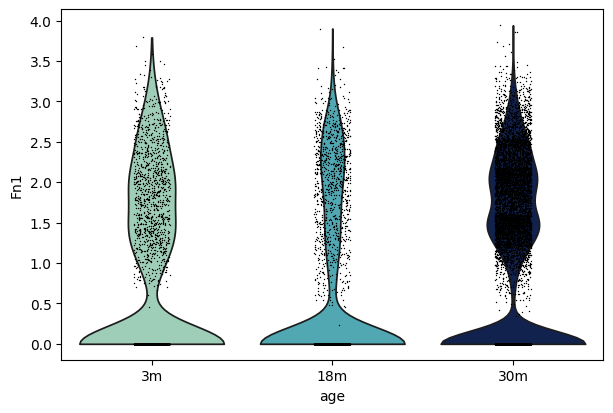

In [20]:
# palette = {"young": "#08306b",
#            "old": "#66c2a5"} # mid blue (clearly visible)

# sc.pl.violin(adata, ["Sftpc", "Retn", "Mrc1", "Cebpb"], groupby="age", use_raw=False)
# sc.pl.violin(adata, "Lyz2", groupby="age", use_raw=False, save="AM__Lyz2_boxplot.pdf")
sc.pl.violin(adata, "Fn1", groupby="age", use_raw=False)

# sc.pl.violin(adata, ["C1QA", "C1QB", "C1QC"], groupby="age", use_raw=False)



T-test: t=5.007, p=6.695e-07
Mann-Whitney U: U=212549.000, p=7.557e-07


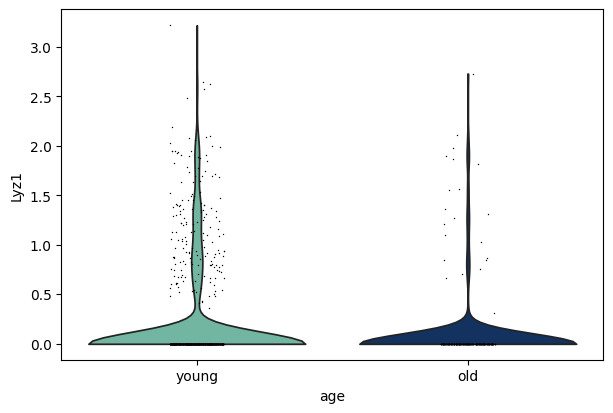

In [90]:
import scipy.stats as stats
import numpy as np

# Extract expression values
gene = "Lyz1"
groups = adata.obs["age"].unique()

# Make sure groups are ordered consistently
group1 = "young"
group2 = "old"

# Expression values from .X (or adata.raw if use_raw=True)
vals = adata[:, gene].X.toarray().ravel() if not isinstance(adata[:, gene].X, np.ndarray) else adata[:, gene].X.ravel()
labels = adata.obs["age"]

x1 = vals[labels == group1]
x2 = vals[labels == group2]

# Run statistical tests
t_stat, t_pval = stats.ttest_ind(x1, x2, equal_var=False)
u_stat, u_pval = stats.mannwhitneyu(x1, x2, alternative="two-sided")

# Print results
print(f"T-test: t={t_stat:.3f}, p={t_pval:.3e}")
print(f"Mann-Whitney U: U={u_stat:.3f}, p={u_pval:.3e}")

# Save to text file
with open("AM__Lyz2_stats.txt", "w") as f:
    f.write(f"Gene: {gene}\n")
    f.write(f"Group1: {group1} (n={len(x1)}), Group2: {group2} (n={len(x2)})\n\n")
    f.write(f"T-test: t={t_stat:.3f}, p={t_pval:.3e}\n")
    f.write(f"Mann-Whitney U: U={u_stat:.3f}, p={u_pval:.3e}\n")

# Make violin plot
sc.pl.violin(adata, gene, groupby="age", use_raw=False, save="AM_Lyz1_boxplot.pdf")


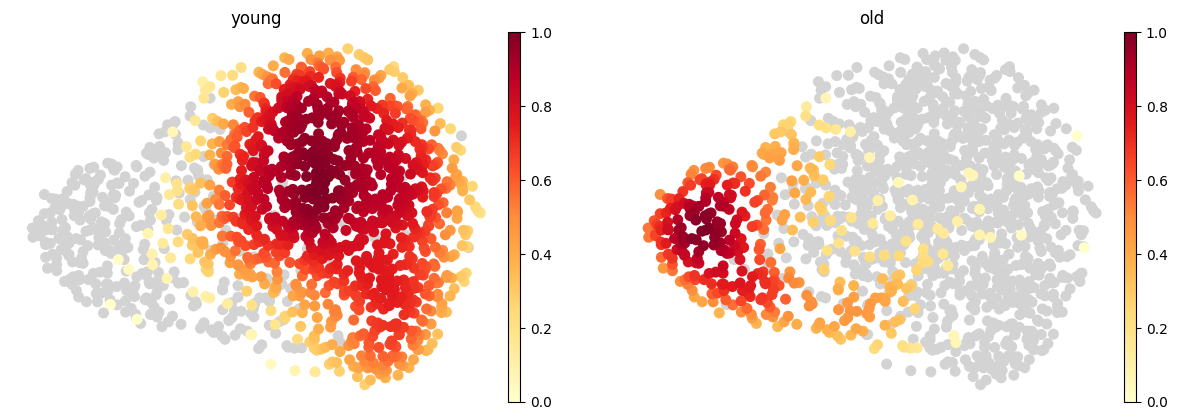

In [56]:
ptype = "density_umap_ages"   
age_key = "age"
sc.tl.embedding_density(adata, groupby="age", basis="umap")  # computes once
sc.pl.embedding_density(adata, groupby="age", basis="umap",
                        ncols=3, # tweak
                        show=True, frameon=False, s=250)

In [57]:
ptype = "density_umap_ages"   
sc.tl.embedding_density(adata, groupby=age_key, basis="umap")
fig = sc.pl.embedding_density(
    adata, groupby=age_key, basis="umap",
    ncols=3, fg_dotsize=250, frameon=False,
    show=False, return_fig=True, bg_dotsize=250)
fig.savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
            bbox_inches="tight", dpi=300)
plt.close(fig)


In [59]:
# import matplotlib.pyplot as plt, matplotlib.colors as mcolors
# # cats = adata.obs["cell_ontology_class"].cat.categories
# cats = adata.obs["cell_ontology_class"].cat.categories
# cmap = plt.get_cmap("tab20")
# palette = [mcolors.to_hex(cmap(i % cmap.N)) for i in range(len(cats))]
# sc.pl.umap(adata, color="cell_ontology_class", palette=palette, size=70, frameon=False)


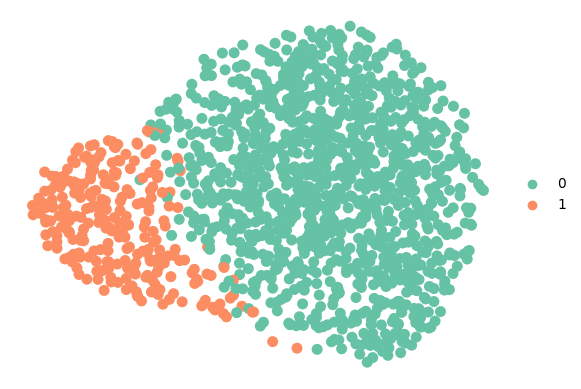

<Figure size 640x480 with 0 Axes>

In [59]:
import pandas as pd
from matplotlib import colors as mcolors  # <-- add this

# make sure neighbors/umap exist; skip if you already have them
if "neighbors" not in adata.uns: sc.pp.neighbors(adata)
if "X_umap"   not in adata.obsm_keys(): sc.tl.umap(adata)

cluster_key = "leiden"


sc.tl.leiden(adata, key_added=cluster_key, resolution=0.3)  # tweak resolution


cats = adata.obs["leiden"].cat.categories
cmap = plt.get_cmap("Set2")
palette = [mcolors.to_hex(cmap(i % cmap.N)) for i in range(len(cats))]
sc.pl.umap(adata, color=cluster_key, size=250, frameon=False, palette=palette, title="")
plt.savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf", bbox_inches="tight")

# cats = adata.obs["leiden"].cat.categories
# cmap = plt.get_cmap("Accent")
# palette = [mcolors.to_hex(cmap(i % cmap.N)) for i in range(len(cats))]
# sc.pl.umap(adata, color="age", size=200, frameon=False, palette=palette)


In [60]:
ptype = "leiden_clusters_umap"
sc.pl.umap(adata, color=cluster_key, size=250, frameon=False, palette=palette,
           title="", show=False)          # <- don't auto-show
plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
                  bbox_inches="tight", dpi=300)
plt.close()


In [23]:
# make age categorical (if not already)
adata.obs["age"] = adata.obs["age"].astype("category")

# compute HVGs on adata.X
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor="seurat_v3", inplace=True)

# DE using only HVGs
sc.tl.rank_genes_groups(adata, groupby="age",
                        mask_var="highly_variable",
                        method="t-test", use_raw=False)


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [24]:
# if age is numeric, make it categorical first:
adata.obs["age"] = adata.obs["age"].astype("category")

sc.tl.rank_genes_groups(
    adata,
    groupby="age",
    mask_var="highly_variable",   # this column is in adata.var
    method="t-test",
    use_raw=False                 # <— key fix
)


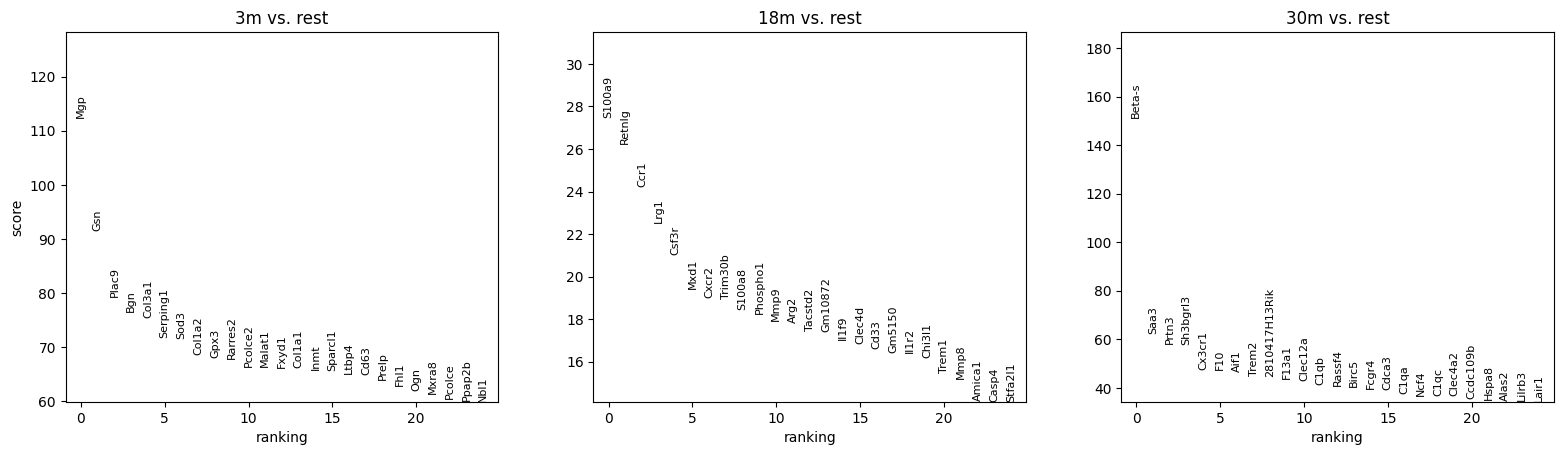

In [25]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [64]:
ptype = "highly_ranked_genes_age"
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=False, frameon=False)
plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
                  bbox_inches="tight", dpi=300)
plt.close()

In [65]:
# Top-N genes per group from adata.uns (no DataFrames)
N = 10
rg = adata.uns["rank_genes_groups"]
groups = list(rg["names"].dtype.names)  # e.g. ['3m','18m','30m']

top20_by_group = {g: rg["names"][g][:N].tolist() for g in groups}


In [26]:
N = 10
rg = adata.uns["rank_genes_groups"]          # or the key you used, e.g. adata.uns["rank_age"]
all_groups = list(rg["names"].dtype.names)

wanted = [g for g in ["young", "old"] if g in all_groups] + \
         [g for g in all_groups if g not in {"young", "old"}]

top20_by_group = {g: rg["names"][g][:N].tolist() for g in wanted}




In [67]:
# adata['rank_genes_groups']

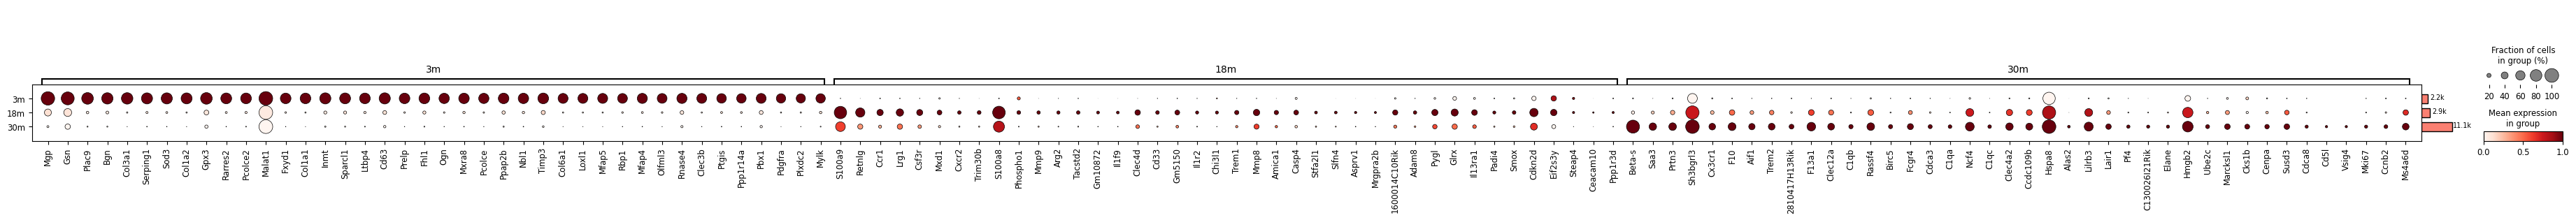

In [27]:
dp = sc.pl.dotplot(adata, top20_by_group, 'age', return_fig=True, use_raw=False, standard_scale="var")
dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_gene

(<matplotlib.collections.PathCollection at 0x7efe7f9087f0>,
 [Text(20030   -9.09022
  Name: logfoldchanges, dtype: float32, 20030    162.22071
  Name: pvals_adj, dtype: float64, 'Col1a2'),
  Text(18524   -1.667702
  Name: logfoldchanges, dtype: float32, 18524    23.729923
  Name: pvals_adj, dtype: float64, 'Fn1'),
  Text(19257   -5.045477
  Name: logfoldchanges, dtype: float32, 19257    44.20319
  Name: pvals_adj, dtype: float64, 'Ctgf'),
  Text(20118   -6.574815
  Name: logfoldchanges, dtype: float32, 20118    250.26318
  Name: pvals_adj, dtype: float64, 'Sparc'),
  Text(9    22.112129
  Name: logfoldchanges, dtype: float32, 9    142.926675
  Name: pvals_adj, dtype: float64, 'C1qa'),
  Text(6    21.236767
  Name: logfoldchanges, dtype: float32, 6    152.923189
  Name: pvals_adj, dtype: float64, 'C1qb'),
  Text(7    17.347692
  Name: logfoldchanges, dtype: float32, 7    152.568669
  Name: pvals_adj, dtype: float64, 'C1qc'),
  Text(11    11.961807
  Name: logfoldchanges, dtype: float32,

/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/matplotlib/text.py:1465: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/matplotlib/text.py:1467: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecate

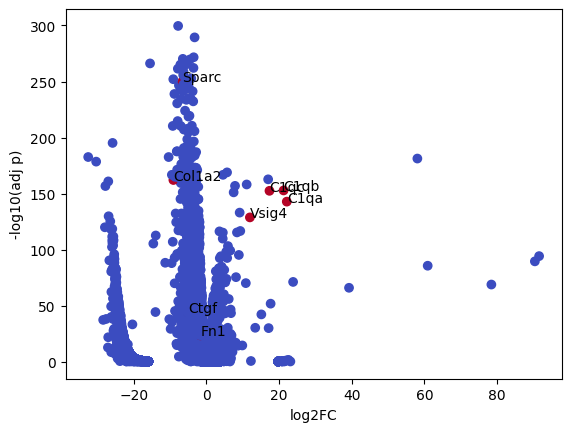

In [38]:
sc.tl.rank_genes_groups(adata, groupby="cell_ontology_class", method="t-test")
# sc.get.rank_genes_groups_df(adata, group="lung macrophage").pipe(lambda df: plt.scatter(df['logfoldchanges'], -np.log10(df['pvals_adj']), c=df['names'].isin(["Col1a2","Fn1","Ctgf","Sparc","C1qa","C1qb","C1qc","Vsig4"]), cmap="coolwarm")); plt.xlabel("log2FC"); plt.ylabel("-log10(adj p)")
sc.get.rank_genes_groups_df(adata, group="lung macrophage").pipe(
    lambda df: (
        plt.scatter(df['logfoldchanges'], -np.log10(df['pvals_adj']),
                    c=df['names'].isin(["Col1a2","Fn1","Ctgf","Sparc","C1qa","C1qb","C1qc","Vsig4"]),
                    cmap="coolwarm"),
        [plt.annotate(g, (df.loc[df['names']==g,'logfoldchanges'], -np.log10(df.loc[df['names']==g,'pvals_adj']))) 
         for g in ["Col1a2","Fn1","Ctgf","Sparc","C1qa","C1qb","C1qc","Vsig4"]],
        plt.xlabel("log2FC"), plt.ylabel("-log10(adj p)")
    )
)


In [80]:
# dp = sc.pl.dotplot(adata, top20_by_group, 'age', return_fig=True,categories_order=["young", "old"])
# dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

In [71]:
import matplotlib.pyplot as plt

ptype = "highly_ranked_genes_age"
dp = sc.pl.dotplot(adata, top20_by_group, groupby="age",
                   return_fig=True, show=False, use_raw=False, standard_scale="var")
dp.add_totals()
dp.style(dot_edge_color="black", dot_edge_lw=0.5)

dp.make_figure()  # builds the plot; returns None in some versions
plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
                  bbox_inches="tight", dpi=300)
plt.close()


In [72]:
# ptype = "boxplot_vertical_top_ranked_genes"   
# dp = sc.pl.dotplot(adata, top20_by_group, "age", return_fig=True, show=False)
# dp = dp.swap_axes().add_totals().style(dot_edge_color="black", dot_edge_lw=1)
# dp.savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf", bbox_inches="tight")

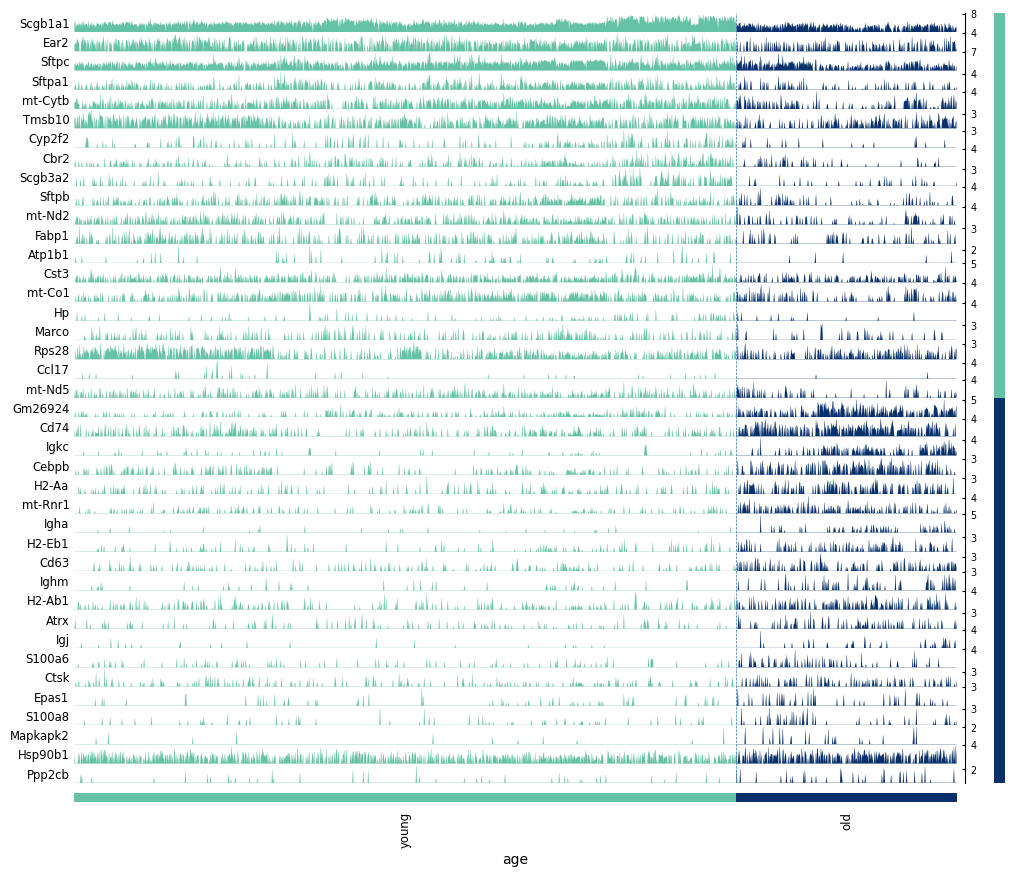

<Figure size 640x480 with 0 Axes>

In [73]:
sc.pl.tracksplot(adata, top20_by_group, groupby='age', dendrogram=False, use_raw=False, standard_scale="var")
plt.savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf", bbox_inches="tight")

In [86]:
# # 1) make sure the order is what you want
# ages = adata.obs["age"].astype("category")
# adata.obs["age"] = ages.cat.reorder_categories(["young", "old"], ordered=True)

# # 2) set colors in the SAME order as the categories
# palette_map = {"young": "#66c2a5",  # mint
#                "old":   "#08306b"}  # dark navy
# order = list(adata.obs["age"].cat.categories)
# adata.uns["age_colors"] = [palette_map[c] for c in order]

# 3) re-plot
sc.pl.tracksplot(adata, top20_by_group, groupby="age",
                 dendrogram=False, show=False, use_raw=False, standard_scale="var")
plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__tracksplot_age.pdf",
                  bbox_inches="tight", dpi=300)
plt.close()



In [102]:
# # 1) make sure the order is what you want
# ages = adata.obs["age"].astype("category")
# adata.obs["age"] = ages.cat.reorder_categories(["young", "old"], ordered=True)

# # 2) set colors in the SAME order as the categories
# palette_map = {"young": "#66c2a5",  # mint
#                "old":   "#08306b"}  # dark navy
order = list(adata.obs["age"].cat.categories)
# adata.uns["age_colors"] = [palette_map[c] for c in order]

# 3) re-plot
sc.pl.tracksplot(adata, top20_by_group, groupby="age",
                 dendrogram=False, show=False, use_raw=False, standard_scale="var")
plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__tracksplot_age.pdf",
                  bbox_inches="tight", dpi=300)
plt.close()


In [85]:
ptype = "tracksplot_age"
sc.pl.tracksplot(adata, top20_by_group, groupby="age", dendrogram=False, show=False, use_raw=False, standard_scale="var")
plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
                  bbox_inches="tight", dpi=300)
plt.close()  # or plt.close('all')


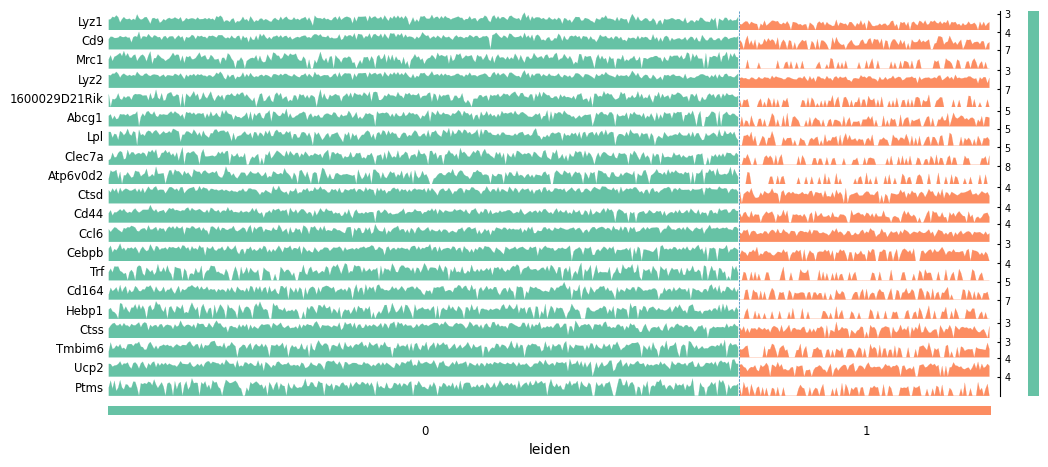

In [103]:
# ptype = "tracksplot_leiden_clusters_age"   

#Comparing leiden cluster groups of of interest
sc.tl.rank_genes_groups(
    adata, groupby="leiden", groups=["0"], reference="1",
    method="wilcoxon", use_raw=False, key_added="rank_0v1"
)

N = 20
rg = adata.uns["rank_0v1"]
groups = ["0"]  # only the tested group is present
top20_by_group = {g: rg["names"][g][:N].tolist() for g in groups}

sc.pl.tracksplot(adata, top20_by_group, groupby="leiden", dendrogram=False, use_raw=False, standard_scale="var")

In [104]:
ptype = "tracksplot_leiden_clusters_age_0_1"
sc.pl.tracksplot(adata, top20_by_group, groupby="leiden", dendrogram=False, show=False, use_raw=False, standard_scale="var")
plt.gcf().savefig(f"{output}/{cell_type_of_interest.replace(' ','_')}__{ptype}.pdf",
                  bbox_inches="tight", dpi=300)
plt.close()

